In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

### LOAD DATA 

In [66]:
data = pd.read_csv("/kaggle/input/companycsv/Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [67]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [68]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### **Convert the target variable Sale into a categorical variable**

In [70]:
data["Sales"] = pd.cut(data["Sales"],  [0,5.39,9.32,17], labels=["low", "medium", "high"], right=False)

### **Convert the categorical variables into numerical values**

In [71]:
encoder = LabelEncoder()

In [72]:
data["ShelveLoc"] = encoder.fit_transform(data["ShelveLoc"])
data["Urban"] = encoder.fit_transform(data["Urban"])
data["US"] = encoder.fit_transform(data["US"])

data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<Figure size 800x800 with 0 Axes>

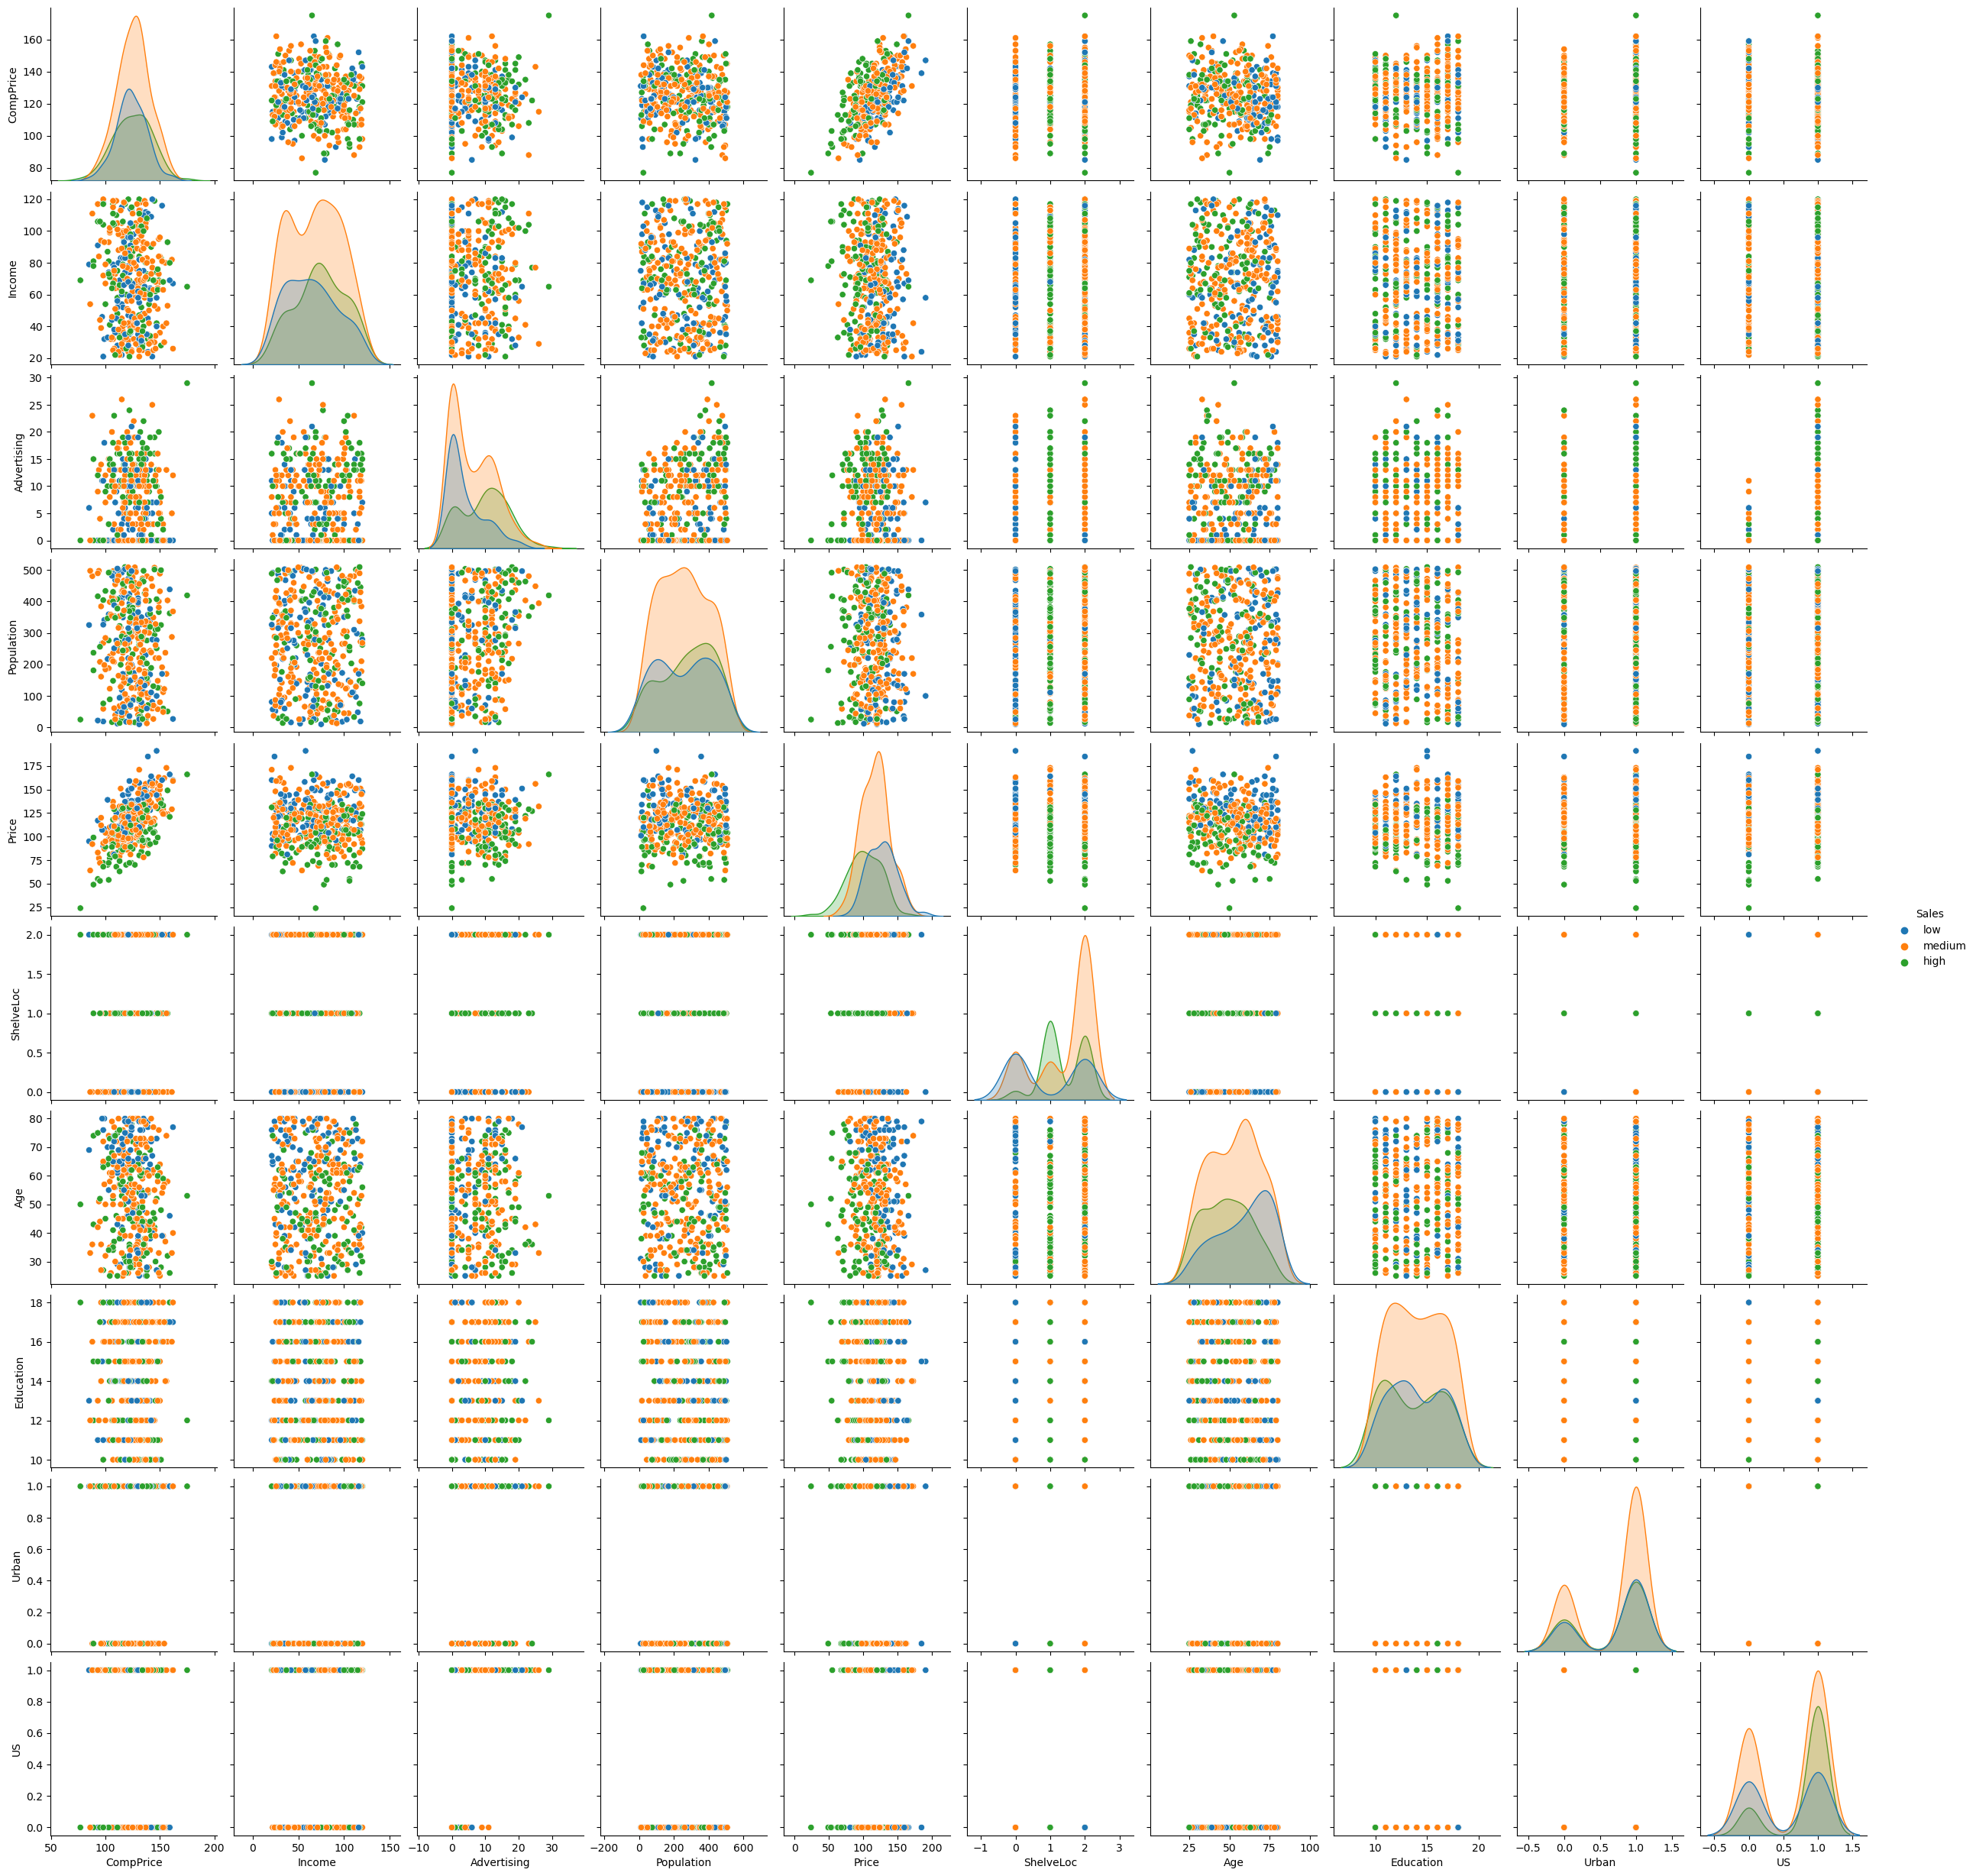

In [73]:
plt.figure(figsize=(8,8))
sns.pairplot(data,hue="Sales")
plt.show()

<AxesSubplot:>

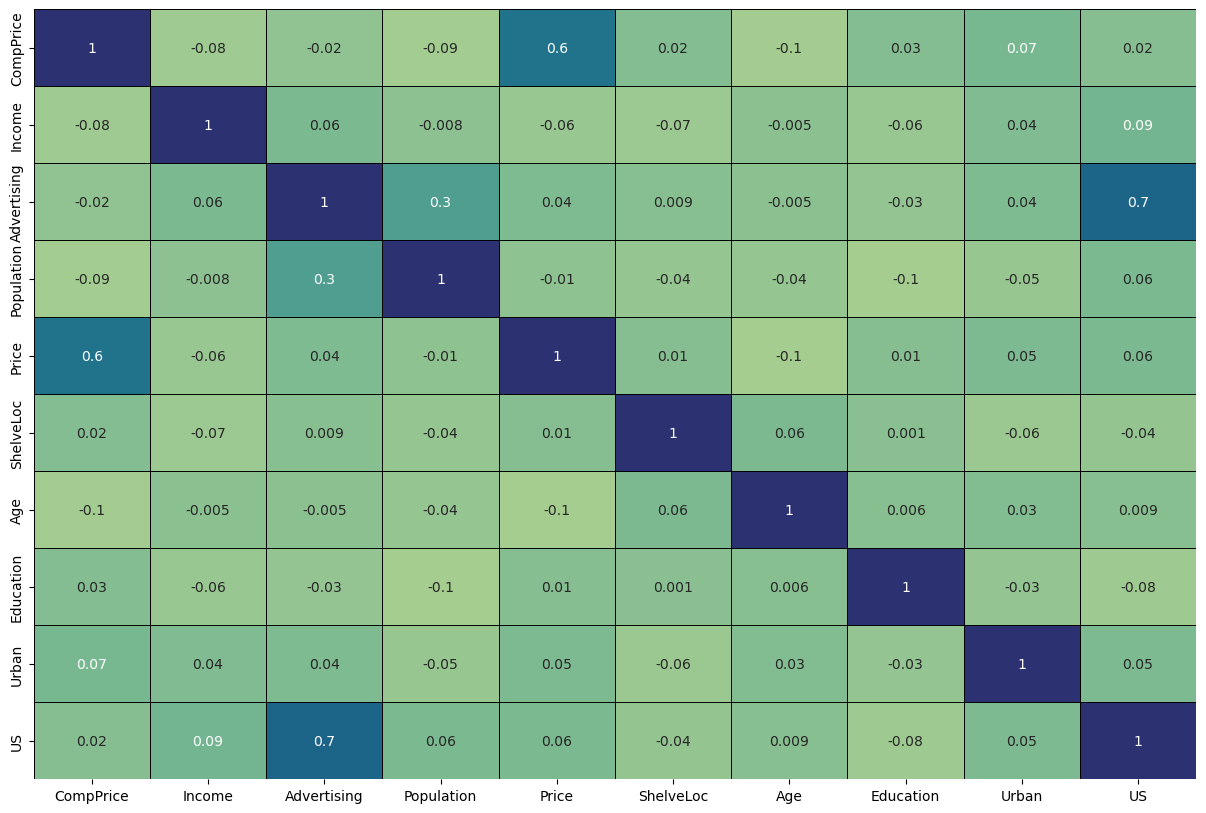

In [74]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.1g', cmap="crest", cbar=False, linewidths=0.5, linecolor='black')

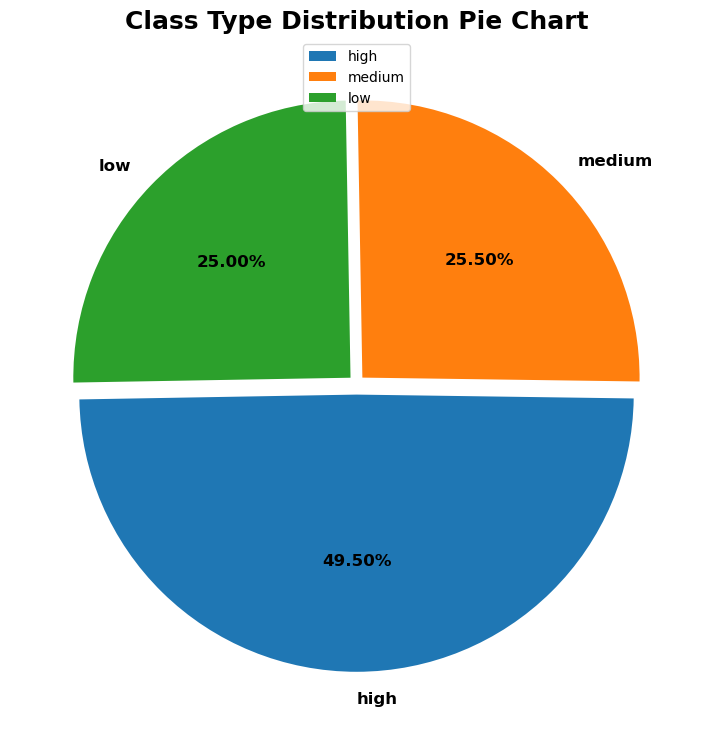

In [75]:
plt.figure(figsize = (16,9))
plt.pie(data['Sales'].value_counts(),
       labels=data.Sales.unique(),
       explode = [0.04,0.03,0.03],
       autopct= '%.2f%%',
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper center')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### **Split the data into training and testing sets**

In [76]:
y = data["Sales"]
X = data.drop("Sales", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Build the decision tree**

In [106]:
model = DecisionTreeClassifier(max_depth=5, min_samples_split=12, random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=12, random_state=1)

[Text(0.4675925925925926, 0.9166666666666666, 'X[5] <= 0.5\ngini = 0.628\nsamples = 320\nvalue = [79, 83, 158]\nclass = high'),
 Text(0.2777777777777778, 0.75, 'X[4] <= 107.5\ngini = 0.534\nsamples = 77\nvalue = [4, 43, 30]\nclass = medium'),
 Text(0.14814814814814814, 0.5833333333333334, 'X[6] <= 54.5\ngini = 0.531\nsamples = 31\nvalue = [3, 9, 19]\nclass = high'),
 Text(0.07407407407407407, 0.4166666666666667, 'X[6] <= 31.5\ngini = 0.245\nsamples = 14\nvalue = [2, 0, 12]\nclass = high'),
 Text(0.037037037037037035, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 0, 1]\nclass = low'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]\nclass = high'),
 Text(0.2222222222222222, 0.4166666666666667, 'X[1] <= 92.0\ngini = 0.547\nsamples = 17\nvalue = [1, 9, 7]\nclass = medium'),
 Text(0.18518518518518517, 0.25, 'gini = 0.298\nsamples = 11\nvalue = [0, 9, 2]\nclass = medium'),
 Text(0.25925925925925924, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [1, 0, 5]\nclass = h

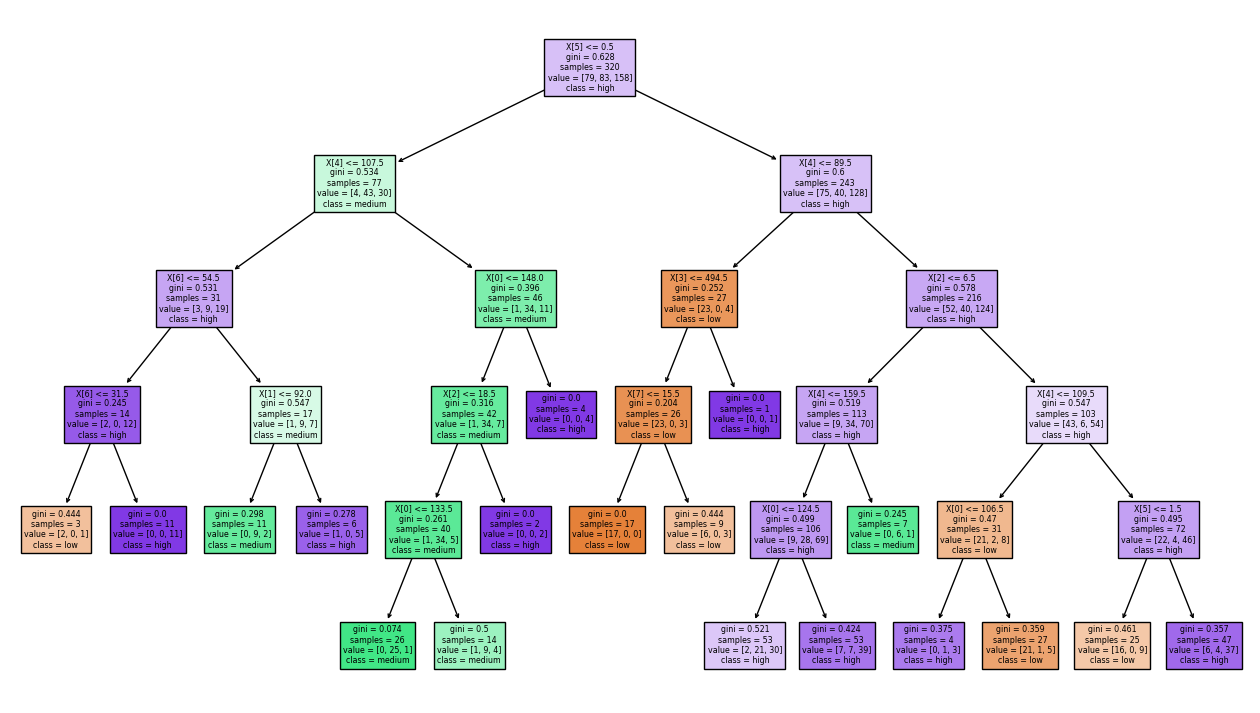

In [107]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,9))
plot_tree(model, class_names=['low','medium', 'high'], filled=True)

### Predict the target variable on the testing set

In [108]:
y_pred = model.predict(X_test)

In [109]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6125


[[14  1  8]
 [ 0  7 10]
 [ 7  5 28]]


<AxesSubplot:>

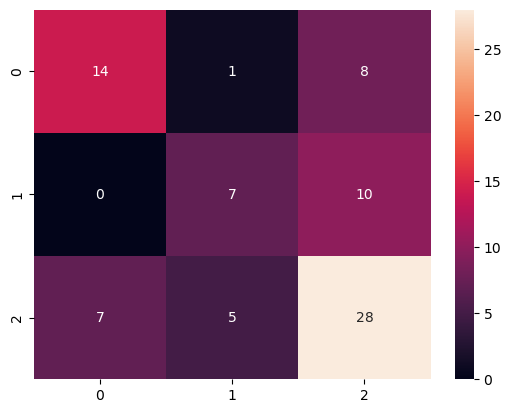

In [110]:
print(confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')

In [111]:
from sklearn.model_selection import GridSearchCV

In [135]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
model = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 2}


In [138]:
model = DecisionTreeClassifier(criterion= 'entropy',max_depth=9,min_samples_split=2, random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=1)

In [139]:
y_pred = model.predict(X_test)

In [140]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.675
